<a href="https://www.kaggle.com/code/erhanalasar/cohort-analysis?scriptVersionId=180229154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

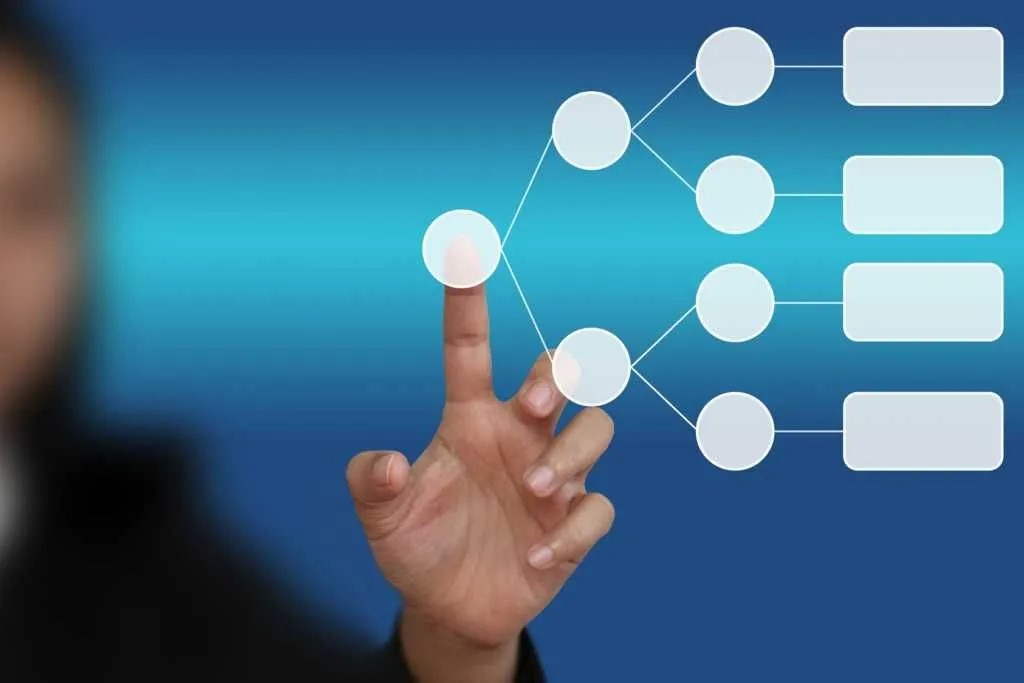

In [1]:
# Let's start with importing the necessary libraries
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns

# What the hell is Cohort Analysis and why it is important? 
       A cohort is a group of people with common characteristics, and the cohort analysis basically is: analyzing the behaviours of a group of people with common charasterics in a given period of time.
    
#     Why it is important:
    Cohort analysis is an important data analysis technique to better understand customer behavior and business performance. It helps businesses understand their customer base, make strategic decisions by monitoring behavior, and optimize business processes.
    

# Our aim is to:

    Identify trends in the acquisition of new users and the retention of returning users on a weekly basis. Understand how user engagement, as indicated by the average duration of interaction, evolves from the first day to the seventh day of usage. Detect any significant weekly patterns or anomalies in user behavior and engagement, and investigate the potential causes behind these trends. Explore the relationship between user retention (returning users) and engagement (duration metrics), to assess the effectiveness of user engagement strategies. Provide actionable insights that can guide marketing efforts, content strategies, and user experience improvements.

In [2]:
# Import the dataset
df = pd.read_csv('/kaggle/input/cohorts/cohorts.csv')
df.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


In [3]:
# Check if there are null values.
df.isnull().sum()

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64

In [4]:
# Know the dataset better. Check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             30 non-null     object 
 1   New users        30 non-null     int64  
 2   Returning users  30 non-null     int64  
 3   Duration Day 1   30 non-null     float64
 4   Duration Day 7   30 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


In [5]:
# Date column date type seems wrong. Lets convert it to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [6]:
# Let's see the desctriptive statistics of the dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,30,2023-11-08 12:00:00,2023-10-25 00:00:00,2023-11-01 06:00:00,2023-11-08 12:00:00,2023-11-15 18:00:00,2023-11-23 00:00:00,NaN
New users,30.0,3418.166667,1929.0,3069.0,3514.5,3829.5,4790.0,677.407486
Returning users,30.0,1352.866667,784.0,1131.5,1388.0,1543.75,1766.0,246.793189
Duration Day 1,30.0,208.259594,59.047619,182.974287,206.356554,230.671046,445.87234,64.73083
Duration Day 7,30.0,136.037157,0.0,68.488971,146.381667,220.021875,304.35,96.624319


### Let's analyze trend analysis for New and Returning Users

In [7]:
fig = go.Figure()

In [8]:
# New_Users
fig.add_trace(go.Scatter(x=df['Date'], y = df['New users'], 
                         mode = 'lines+markers', name = 'New Users'))
# Returning Users
fig.add_trace(go.Scatter(x=df['Date'], y = df['Returning users'],
                         mode = 'lines+markers', name = 'Returning Users'))
# Update layout
fig.update_layout(title = 'Trend of New and Returning Users Over Time',
                  xaxis_title = 'Date',
                  yaxis_title = 'Number of Users')
# Show figure
fig.show()

##### As it's shown by the figure there is a high positive correlation between New Users and Returning Users

### Now, let’s have a look at the trend of duration over time:

In [9]:
# Trend analysis for New and Returning Users
fig = go.Figure()

In [10]:
# Duration Day 1
fig.add_trace(go.Scatter(x=df['Date'], y = df['Duration Day 1'], 
                         mode = 'lines+markers', name = 'Duration Day 1'))
# Duration Day 7
fig.add_trace(go.Scatter(x=df['Date'], y = df['Duration Day 7'],
                         mode = 'lines+markers', name = 'Duration Day 7'))
# Update layout
fig.update_layout(title = 'Trends of Duration Day 1 and Duration Day 7 Over Time',
                  xaxis_title = 'Date',
                  yaxis_title = 'Duration')
# Show figure
fig.show()

##### Now, let’s have a look at the correlation between the variables:

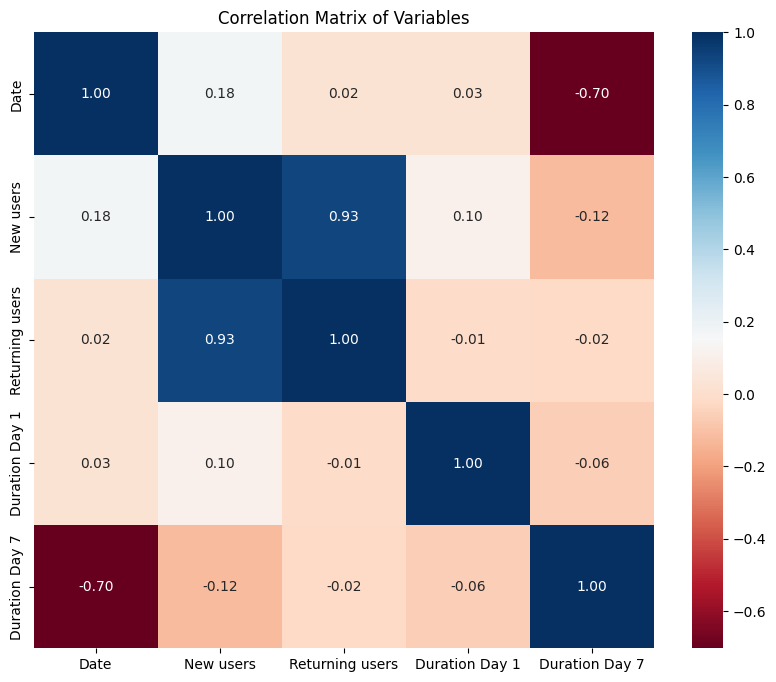

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f",)
plt.title('Correlation Matrix of Variables')
plt.show()

##### Here, the strongest correlation is between the number of new and returning users, indicating a potential trend of new users converting to returning users.

#### Now Here’s How to Perform Cohort Analysis using Python
    For the task of Cohort Analysis, we’ll group the data by the week of the year to create cohorts. Then, for each cohort (week), we’ll calculate the average number of new and returning users, as well as the average of Duration Day 1 and Duration Day 7. Let’s start by grouping the data by week and calculating the necessary averages:

In [12]:
# Grouping data by week
df['Week'] = df['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = df.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

weekly_averages.head()

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


##### Now, let’s have a look at the weekly average of the new and returning users and the duration:

In [13]:
fig1 = px.line(weekly_averages, x='Week', y =['New users', 'Returning users'], markers = True,
               labels = {'value': 'Average Number of Users'}, title = 'Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title = 'Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y = ['Duration Day 1','Duration Day 7'], markers = True,
               labels = {'value': 'Average Duration'}, title = 'Weekly Average of Duration (Day 1 vs. Day 7')
fig2.update_xaxes(title = 'Week of the Year')
fig2.update_yaxes(title = 'Average Duration')
               
fig1.show()
fig2.show()

#### Now, let’s create a cohort chart to understand the cohort matrix of weekly averages. In the cohort chart, each row will correspond to a week of the year, and each column will represent a different metric:

    Average number of new users.
    Average number of returning users.
    Average duration on Day 1.
    Average duration on Day 7.

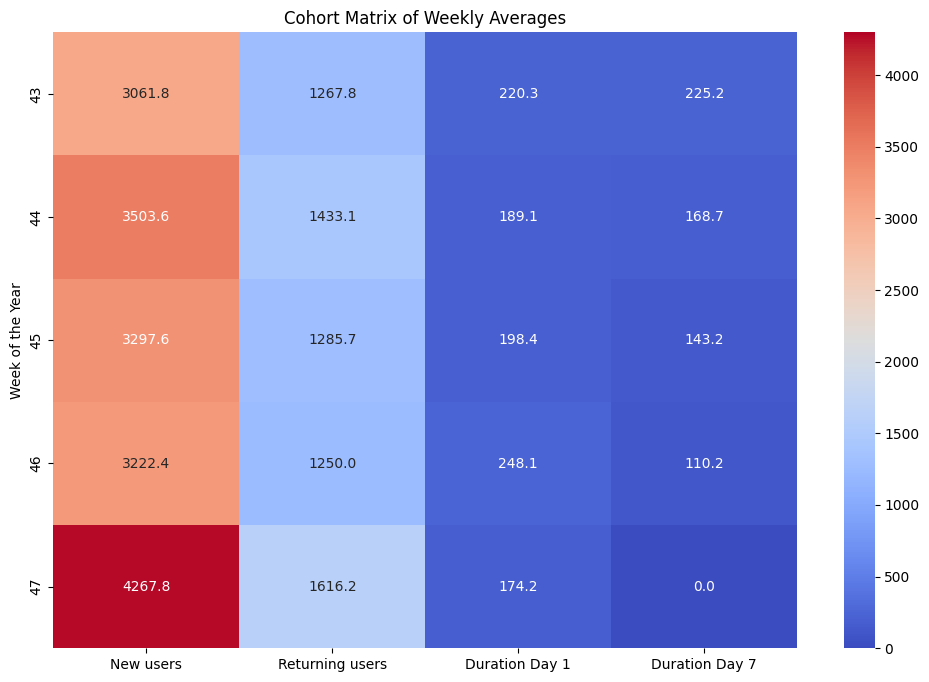

In [14]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# plotting the cohort matrix
plt.figure(figsize = (12,8))
sns.heatmap(cohort_matrix, annot=True,cmap = 'coolwarm', fmt = ".1f",vmin = -1, vmax = 4300)

plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

##### We can see that the number of new users and returning users fluctuates from week to week. Notably, there was a significant increase in both new and returning users in Week 47. The average duration of user engagement on Day 1 and Day 7 varies across the weeks. The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.

# Summary:
       This was a small project to gain more insights on how to perform crm anlaytics